In [99]:
import pandas as pd

In [100]:
df = pd.read_csv('train_filedemand.csv')

/tmp/ipython-input-747034159.py:1: DtypeWarning: Columns (0,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train_filedemand.csv')


In [101]:
df

,,,,,,,,train_0irEZ2H 3
record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
3,17/01/11,8091,216425,133.95,133.95,0,0,19
4,17/01/11,8091,216233,133.95,133.95,0,0,44
...,...,...,...,...,...,...,...,...
212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
212642,09/07/13,9984,245338,357.675,483.7875,1,1,31
212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [ ]:
#df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)
display(df.head())

In [ ]:
#df['week'] = pd.to_datetime(df['week'], format='%d/%m/%y')
display(df.head())

In [114]:
print(df.columns)

Index(['train_0irEZ2H 3'], dtype='object')


In [140]:
df = pd.read_csv('/content/train_filedemand.csv', sep=',', skiprows=[0])
display(df.head())

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [116]:
!ls /content/

sample_data  train_filedemand.csv


In [117]:
df = df.drop('week', axis=1)


In [118]:
print(df.columns)

Index(['record_ID', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold'],
      dtype='object')


In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [120]:
X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [152]:
model.score(X_test, y_test)

0.7835458518072325

In [153]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)

26.64982867483895


In [124]:
df.units_sold.describe()

,units_sold
count,150150.000000
mean,51.674206
std,60.207904
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,2876.000000


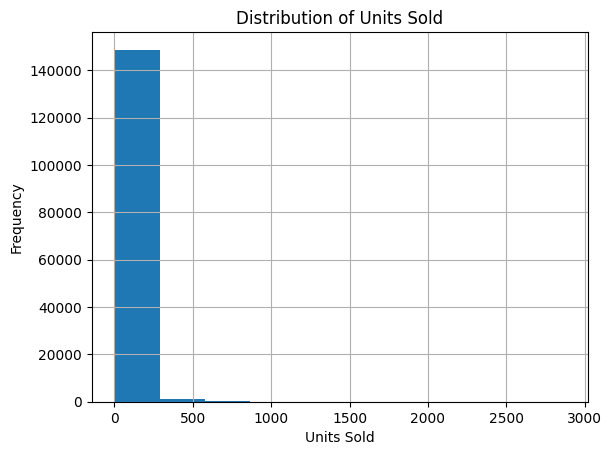

In [125]:
import matplotlib.pyplot as plt

df['units_sold'].hist()
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Units Sold')
plt.show()

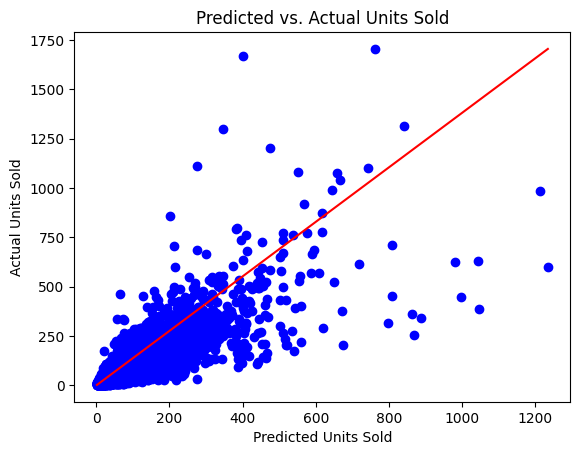

In [126]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_pred, y_test, color='blue')
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color="red")
plt.xlabel('Predicted Units Sold')
plt.ylabel('Actual Units Sold')
plt.title('Predicted vs. Actual Units Sold')
plt.show()

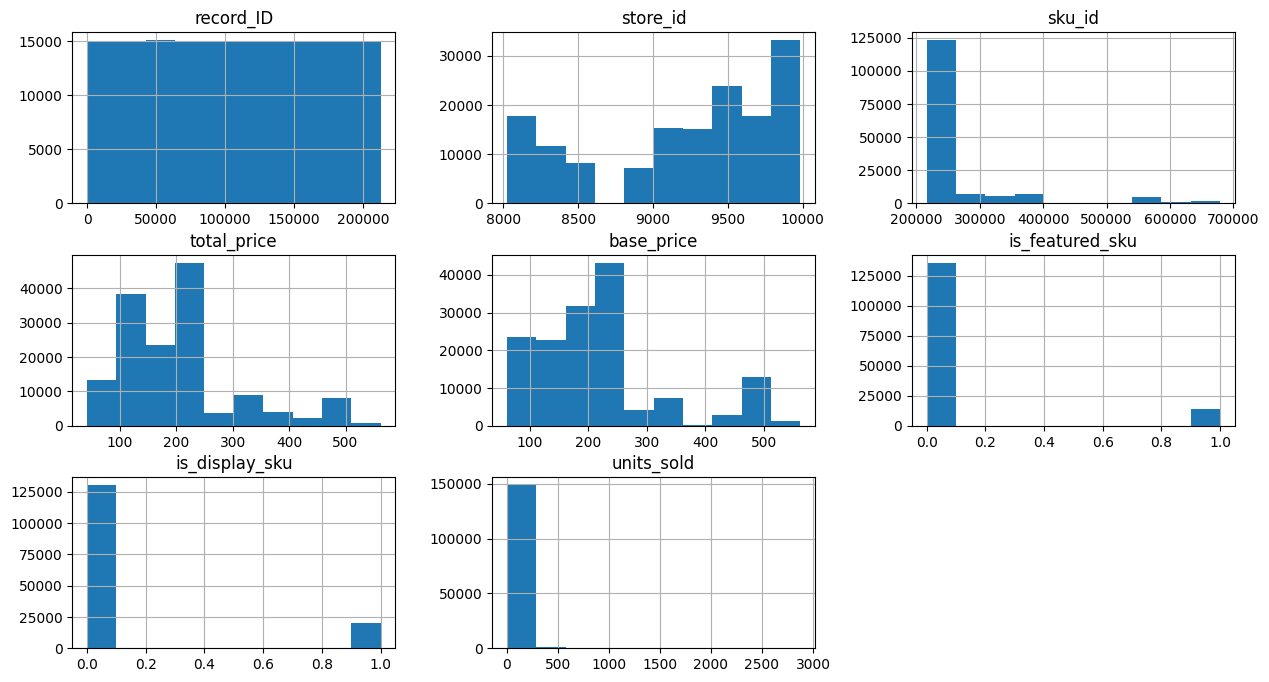

In [127]:
df.hist(figsize=(15,8))
plt.show()

In [128]:
df = df.drop('record_ID', axis=1)

In [131]:
len(df.store_id.unique())

76

In [132]:
len(df.sku_id.unique())

28

In [133]:
df.units_sold.quantile(0.99)

np.float64(283.0)

In [134]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,8091,216418,99.0375,111.8625,0,0,20
1,8091,216419,99.0375,99.0375,0,0,28
2,8091,216425,133.9500,133.9500,0,0,19
3,8091,216233,133.9500,133.9500,0,0,44
4,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38
150146,9984,223153,235.8375,235.8375,0,0,30
150147,9984,245338,357.6750,483.7875,1,1,31
150148,9984,547934,141.7875,191.6625,0,1,12


<Axes: >

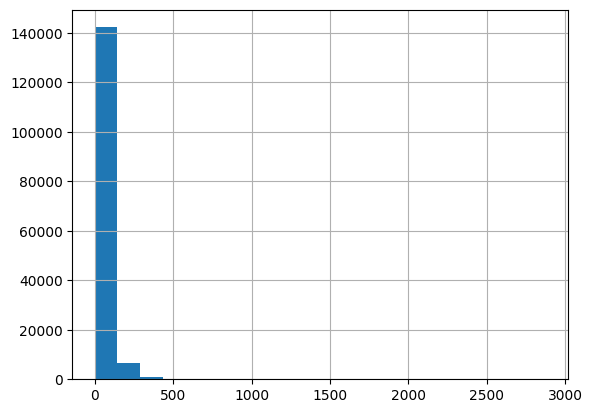

In [135]:
df.units_sold.hist(bins=20)

In [139]:
df = pd.get_dummies(df.store_id, prefix='store')

In [141]:
store_dummies = pd.get_dummies(df['store_id'], prefix='store', drop_first=True)
df = pd.concat([df, store_dummies], axis=1)
df = df.drop('store_id', axis=1)
display(df.head())

,record_ID,week,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,store_8058,store_8063,...,store_9872,store_9876,store_9879,store_9880,store_9881,store_9890,store_9909,store_9954,store_9961,store_9984
0,1,17/01/11,216418,99.0375,111.8625,0,0,20,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,17/01/11,216419,99.0375,99.0375,0,0,28,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,17/01/11,216425,133.9500,133.9500,0,0,19,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,17/01/11,216233,133.9500,133.9500,0,0,44,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,17/01/11,217390,141.0750,141.0750,0,0,52,False,False,...,False,False,False,False,False,False,False,False,False,False


In [149]:
X = df.drop(['units_sold', 'week'], axis=1)
y = df['units_sold']
display(X.head())
display(y.head())

,record_ID,total_price,base_price,is_featured_sku,is_display_sku,store_8058,store_8063,store_8091,store_8094,store_8095,...,sku_398721,sku_545621,sku_546789,sku_547934,sku_600934,sku_673209,sku_679023,day,month,year
0,1,99.0375,111.8625,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,17,01,11
1,2,99.0375,99.0375,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,17,01,11
2,3,133.9500,133.9500,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,17,01,11
3,4,133.9500,133.9500,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,17,01,11
4,5,141.0750,141.0750,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,17,01,11


,units_sold
0,20
1,28
2,19
3,44
4,52


In [143]:
print(len(df.columns))

83


In [144]:
sku_dummies = pd.get_dummies(df['sku_id'], prefix='sku', drop_first=True)
df = pd.concat([df, sku_dummies], axis=1)
df = df.drop('sku_id', axis=1)
display(df.head())

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,store_8058,store_8063,store_8091,...,sku_320485,sku_327492,sku_378934,sku_398721,sku_545621,sku_546789,sku_547934,sku_600934,sku_673209,sku_679023
0,1,17/01/11,99.0375,111.8625,0,0,20,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,17/01/11,99.0375,99.0375,0,0,28,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3,17/01/11,133.9500,133.9500,0,0,19,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,17/01/11,133.9500,133.9500,0,0,44,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,17/01/11,141.0750,141.0750,0,0,52,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [145]:
print(len(df.columns))

109


In [146]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)
display(df.head())

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,store_8058,store_8063,store_8091,...,sku_398721,sku_545621,sku_546789,sku_547934,sku_600934,sku_673209,sku_679023,day,month,year
0,1,17/01/11,99.0375,111.8625,0,0,20,False,False,True,...,False,False,False,False,False,False,False,17,01,11
1,2,17/01/11,99.0375,99.0375,0,0,28,False,False,True,...,False,False,False,False,False,False,False,17,01,11
2,3,17/01/11,133.9500,133.9500,0,0,19,False,False,True,...,False,False,False,False,False,False,False,17,01,11
3,4,17/01/11,133.9500,133.9500,0,0,44,False,False,True,...,False,False,False,False,False,False,False,17,01,11
4,5,17/01/11,141.0750,141.0750,0,0,52,False,False,True,...,False,False,False,False,False,False,False,17,01,11


In [147]:
print(len(df.columns))

112


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop(['units_sold', 'week'], axis=1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added random_state for reproducibility

model = RandomForestRegressor(n_jobs=-1, random_state=42) # Added random_state for reproducibility
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

# Task
Improve the performance of the random forest model.

## Feature engineering from date

### Subtask:
Extract more features from the `week` column, such as day of the week, week of the year, and quarter.


**Reasoning**:
Convert the 'week' column to datetime objects and extract day of the week, week of year, and quarter.



In [154]:
df['week'] = pd.to_datetime(df['week'], format='%d/%m/%y')
df['day_of_week'] = df['week'].dt.dayofweek
df['week_of_year'] = df['week'].dt.isocalendar().week
df['quarter'] = df['week'].dt.quarter
display(df.head())

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,store_8058,store_8063,store_8091,...,sku_547934,sku_600934,sku_673209,sku_679023,day,month,year,day_of_week,week_of_year,quarter
0,1,2011-01-17,99.0375,111.8625,0,0,20,False,False,True,...,False,False,False,False,17,01,11,0,3,1
1,2,2011-01-17,99.0375,99.0375,0,0,28,False,False,True,...,False,False,False,False,17,01,11,0,3,1
2,3,2011-01-17,133.9500,133.9500,0,0,19,False,False,True,...,False,False,False,False,17,01,11,0,3,1
3,4,2011-01-17,133.9500,133.9500,0,0,44,False,False,True,...,False,False,False,False,17,01,11,0,3,1
4,5,2011-01-17,141.0750,141.0750,0,0,52,False,False,True,...,False,False,False,False,17,01,11,0,3,1


## Feature engineering from price

### Subtask:
Create new features based on `total_price` and `base_price`, such as price difference or price ratio.


**Reasoning**:
Create new features 'price_difference' and 'price_ratio' from existing price columns, handling potential division by zero for 'price_ratio'.



In [155]:
df['price_difference'] = df['total_price'] - df['base_price']
# Add a small epsilon to the base_price to avoid division by zero
epsilon = 1e-6
df['price_ratio'] = df['total_price'] / (df['base_price'] + epsilon)
display(df.head())

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,store_8058,store_8063,store_8091,...,sku_673209,sku_679023,day,month,year,day_of_week,week_of_year,quarter,price_difference,price_ratio
0,1,2011-01-17,99.0375,111.8625,0,0,20,False,False,True,...,False,False,17,01,11,0,3,1,-12.825,0.88535
1,2,2011-01-17,99.0375,99.0375,0,0,28,False,False,True,...,False,False,17,01,11,0,3,1,0.000,1.00000
2,3,2011-01-17,133.9500,133.9500,0,0,19,False,False,True,...,False,False,17,01,11,0,3,1,0.000,1.00000
3,4,2011-01-17,133.9500,133.9500,0,0,44,False,False,True,...,False,False,17,01,11,0,3,1,0.000,1.00000
4,5,2011-01-17,141.0750,141.0750,0,0,52,False,False,True,...,False,False,17,01,11,0,3,1,0.000,1.00000


## Handle skewness in target variable

### Subtask:
Consider transforming the `units_sold` column to reduce skewness, which can sometimes improve model performance.


**Reasoning**:
Examine the distribution and calculate the skewness of the `units_sold` column, then apply a log transformation if necessary and visualize the transformed distribution.



Skewness of original units_sold: 6.114934735054207
Skewness of transformed units_sold: 0.005295744529658328


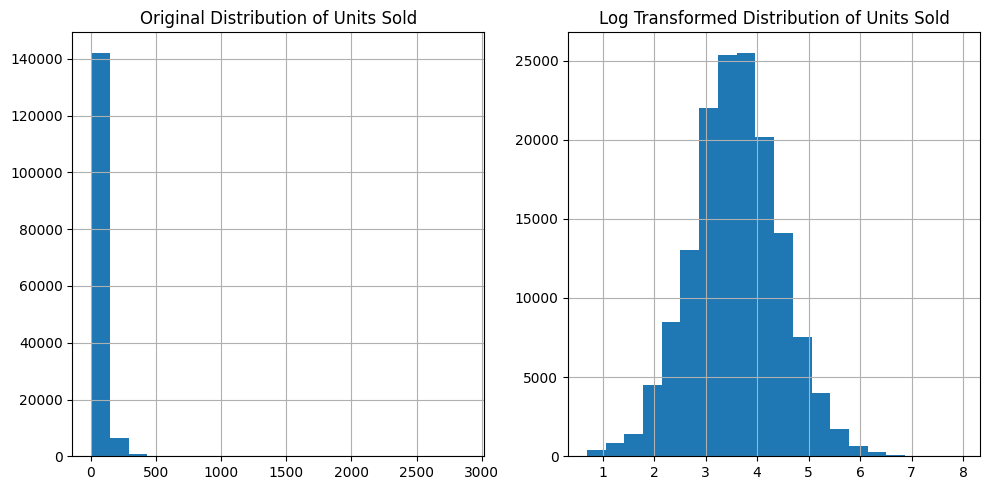

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['units_sold'].hist(bins=20)
plt.title('Original Distribution of Units Sold')

skewness = skew(df['units_sold'])
print(f"Skewness of original units_sold: {skewness}")

if skewness > 0.5: # Common threshold for significant positive skewness
    df['units_sold_transformed'] = np.log1p(df['units_sold'])
    plt.subplot(1, 2, 2)
    df['units_sold_transformed'].hist(bins=20)
    plt.title('Log Transformed Distribution of Units Sold')
    transformed_skewness = skew(df['units_sold_transformed'])
    print(f"Skewness of transformed units_sold: {transformed_skewness}")

plt.tight_layout()
plt.show()

## Re-split data

### Subtask:
Split the DataFrame with the new features into training and testing sets.


**Reasoning**:
Define X and y and split the data into training and testing sets using train_test_split with a test size of 0.2 and a random state of 42 for reproducibility.



In [157]:
X = df.drop(['units_sold', 'week'], axis=1)
y = df['units_sold_transformed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model

### Subtask:
Train the RandomForestRegressor model with the updated training data (`X_train`, `y_train`).


**Reasoning**:
Train the RandomForestRegressor model with the updated training data.



In [158]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

## Evaluate model

### Subtask:
Evaluate the performance of the trained model using appropriate metrics (e.g., R-squared, RMSE).


**Reasoning**:
Make predictions on the test set, inverse transform the predictions and actual values, and calculate the R-squared and RMSE on the original scale.



In [166]:
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

y_pred_transformed = model.predict(X_test)
y_pred = np.expm1(y_pred_transformed)
y_test_original = np.expm1(y_test)

r2 = r2_score(y_test_original, y_pred)
rmse = root_mean_squared_error(y_test_original, y_pred)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

R-squared: 0.9999737325981021
RMSE: 0.29357564538246006


**Reasoning**:
The previous command failed because `mean_squared_error` does not have a `squared` parameter in this version of scikit-learn. I need to use `root_mean_squared_error` directly to get the RMSE.



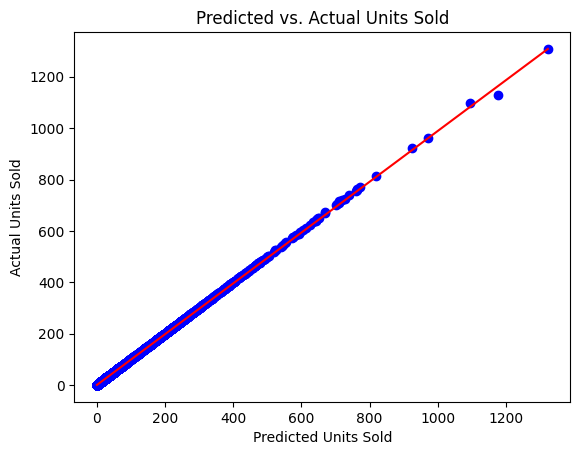

In [172]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_pred, y_test_original, color='blue')
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test_original.min(), y_test_original.max()), color="red")
plt.xlabel('Predicted Units Sold')
plt.ylabel('Actual Units Sold')
plt.title('Predicted vs. Actual Units Sold')
plt.show()